In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Datos del problema
items = [
    {"peso": 2, "valor": 3},
    {"peso": 3, "valor": 4},
    {"peso": 4, "valor": 5},
    {"peso": 5, "valor": 8},
]
capacidad = 8

In [2]:
def knapsack(items, capacidad):
    n = len(items)
    dp = np.zeros((n + 1, capacidad + 1))  # Matriz DP
    
    # Llenar la matriz
    for i in range(1, n + 1):
        for w in range(1, capacidad + 1):
            if items[i - 1]["peso"] <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - items[i - 1]["peso"]] + items[i - 1]["valor"])
            else:
                dp[i][w] = dp[i - 1][w]
                seleccionados = []
    w = capacidad
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i - 1][w]:
            seleccionados.append(items[i - 1])
            w -= items[i - 1]["peso"]
    
    return dp[n][capacidad], seleccionados
max_valor, seleccionados = knapsack(items, capacidad)
print(f"Valor máximo: {max_valor}")
print("Artículos seleccionados:")
for item in seleccionados:
    print(item)


Valor máximo: 12.0
Artículos seleccionados:
{'peso': 5, 'valor': 8}
{'peso': 3, 'valor': 4}


In [3]:
predicciones = [3, 7, 9, max_valor]
valores_reales = [3, 7, 9, 10]  # Suponiendo que 10 es el valor teórico óptimo

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(valores_reales, predicciones)
mse = mean_squared_error(valores_reales, predicciones)
rmse = np.sqrt(mse)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

MAE: 0.5, MSE: 1.0, RMSE: 1.0


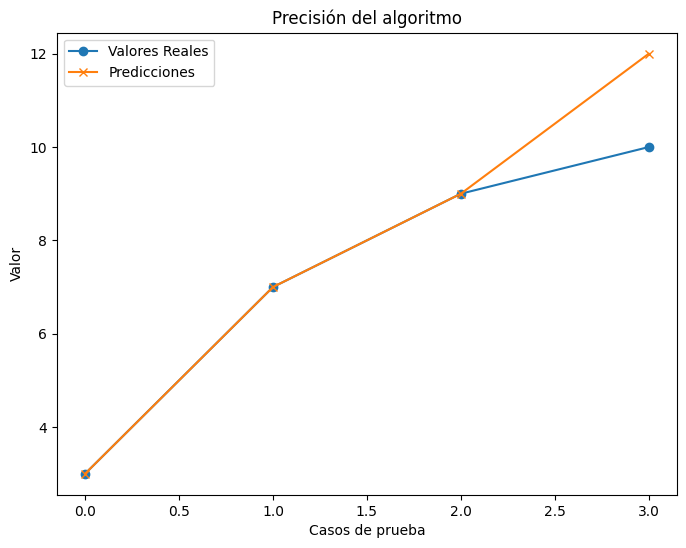

In [5]:
plt.figure(figsize=(8, 6))
plt.plot(range(len(valores_reales)), valores_reales, label="Valores Reales", marker='o')
plt.plot(range(len(predicciones)), predicciones, label="Predicciones", marker='x')
plt.title("Precisión del algoritmo")
plt.xlabel("Casos de prueba")
plt.ylabel("Valor")
plt.legend()
plt.show()